In [1]:
import tensorflow as tf

# devices recognized by tensorflow
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import numpy as np

**The aim is to build word embeddings for a small corpus akin to word2vec using Tensorflow**

In [3]:
from bs4 import BeautifulSoup
import requests

url = "https://en.wikipedia.org/wiki/The_Lord_of_the_Rings"
request = requests.get(url)

soup = BeautifulSoup(request.text, "html.parser")

# get the text from the first 7 <p> tags
paragraphs = soup.find_all("p")[:7]

text = ""

for paragraph in paragraphs:
    text += paragraph.text

In [4]:
import re
text = re.sub(r'\[[^]]*\]', '', text)
text = re.sub('\n', '', text)
text = re.sub('J\. R\. R\.', 'JRR', text)
text = re.sub('[,;]', ' ', text)
text = re.sub('\.', ' .', text)

In [5]:
text = text.lower()
text = re.sub("although", "", text)
print(text)

the lord of the rings is an epic high-fantasy novel by english author and scholar jrr tolkien . set in middle-earth  the story began as a sequel to tolkien's 1937 children's book the hobbit  but eventually developed into a much larger work . written in stages between 1937 and 1949  the lord of the rings is one of the best-selling books ever written  with over 150 million copies sold .the title refers to the story's main antagonist  the dark lord sauron  who  in an earlier age  created the one ring to rule the other rings of power given to men  dwarves  and elves  in his campaign to conquer all of middle-earth . from homely beginnings in the shire  a hobbit land reminiscent of the english countryside  the story ranges across middle-earth  following the quest to destroy the one ring  seen mainly through the eyes of the hobbits frodo  sam  merry  and pippin . aiding frodo are the wizard gandalf  the man aragorn  the elf legolas  and the dwarf gimli  who unite in order to rally the free pe

In [6]:
vocab = []

for word in text.split():
    if word not in vocab and word != ".":
        vocab.append(word)

vocab_size = len(vocab)
print(vocab_size)

251


In [7]:
word2int = {}
int2word = {}

for index, word in enumerate(vocab):
    word2int[word] = index
    int2word[index] = word

In [8]:
print(word2int["sauron"], int2word[57])

58 dark


In [9]:
raw_sentences = text.split(".")
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

In [10]:
print(sentences[4])

['from', 'homely', 'beginnings', 'in', 'the', 'shire', 'a', 'hobbit', 'land', 'reminiscent', 'of', 'the', 'english', 'countryside', 'the', 'story', 'ranges', 'across', 'middle-earth', 'following', 'the', 'quest', 'to', 'destroy', 'the', 'one', 'ring', 'seen', 'mainly', 'through', 'the', 'eyes', 'of', 'the', 'hobbits', 'frodo', 'sam', 'merry', 'and', 'pippin']


In [11]:
data = []

# hyperparamter
WINDOW_SIZE = 4

for sentence in sentences:
    for index, word in enumerate(sentence):
        for neighbor in sentence[max(index - WINDOW_SIZE, 0): min(index + WINDOW_SIZE, len(sentence)) + 1]:
            if neighbor != word:
                data.append([word, neighbor])

In [12]:
data

[['the', 'lord'],
 ['the', 'of'],
 ['the', 'rings'],
 ['lord', 'the'],
 ['lord', 'of'],
 ['lord', 'the'],
 ['lord', 'rings'],
 ['lord', 'is'],
 ['of', 'the'],
 ['of', 'lord'],
 ['of', 'the'],
 ['of', 'rings'],
 ['of', 'is'],
 ['of', 'an'],
 ['the', 'lord'],
 ['the', 'of'],
 ['the', 'rings'],
 ['the', 'is'],
 ['the', 'an'],
 ['the', 'epic'],
 ['rings', 'the'],
 ['rings', 'lord'],
 ['rings', 'of'],
 ['rings', 'the'],
 ['rings', 'is'],
 ['rings', 'an'],
 ['rings', 'epic'],
 ['rings', 'high-fantasy'],
 ['is', 'lord'],
 ['is', 'of'],
 ['is', 'the'],
 ['is', 'rings'],
 ['is', 'an'],
 ['is', 'epic'],
 ['is', 'high-fantasy'],
 ['is', 'novel'],
 ['an', 'of'],
 ['an', 'the'],
 ['an', 'rings'],
 ['an', 'is'],
 ['an', 'epic'],
 ['an', 'high-fantasy'],
 ['an', 'novel'],
 ['an', 'by'],
 ['epic', 'the'],
 ['epic', 'rings'],
 ['epic', 'is'],
 ['epic', 'an'],
 ['epic', 'high-fantasy'],
 ['epic', 'novel'],
 ['epic', 'by'],
 ['epic', 'english'],
 ['high-fantasy', 'rings'],
 ['high-fantasy', 'is'],
 ['hig

In [13]:
def to_one_hot_vectors(index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[index] = 1
    return temp

x_train = []
y_train = []

for data_word in data:
    x_train.append(to_one_hot_vectors(word2int[data_word[0]], vocab_size))
    y_train.append(to_one_hot_vectors(word2int[data_word[1]], vocab_size))

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [14]:
x_train.shape, y_train.shape

((3342, 251), (3342, 251))

In [15]:
EMBEDDING_DIM = 10
VOCAB_SIZE = len(vocab)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, input_shape=(VOCAB_SIZE, ), kernel_initializer='random_normal', bias_initializer='random_normal'),
    tf.keras.layers.Dense(EMBEDDING_DIM, input_shape=(VOCAB_SIZE, ), activation="relu"),
    tf.keras.layers.Dense(VOCAB_SIZE, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                12600     
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
 dense_2 (Dense)             (None, 251)               2761      
                                                                 
Total params: 15,871
Trainable params: 15,871
Non-trainable params: 0
_________________________________________________________________


In [16]:
n_iters = 10000
for i in range(n_iters):
    model.train_on_batch(x_train, y_train)
    if i % 1000 == 0:
        print("iteration: ", i)
        loss = model.evaluate(x_train, y_train, verbose=0)
        print("loss: ", loss)

2023-05-26 19:46:46.704744: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


iteration:  0
loss:  [5.527323246002197, 0.008976660668849945]
iteration:  1000
loss:  [3.0937161445617676, 0.1388390213251114]
iteration:  2000
loss:  [2.973789930343628, 0.14362657070159912]
iteration:  3000
loss:  [2.938722610473633, 0.1451226770877838]
iteration:  4000
loss:  [2.9243762493133545, 0.14931179583072662]
iteration:  5000
loss:  [2.916463613510132, 0.14931179583072662]
iteration:  6000
loss:  [2.9114503860473633, 0.14931179583072662]
iteration:  7000
loss:  [2.9080607891082764, 0.14931179583072662]
iteration:  8000
loss:  [2.905503511428833, 0.15200479328632355]
iteration:  9000
loss:  [2.903416633605957, 0.152304008603096]


In [17]:
word_embeddings = model.layers[1].get_weights()[0]

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
def find_closest_n_words(word, n):
    similarity_matrix = cosine_similarity(word_embeddings, word_embeddings)
    index = word2int[word]
    sim = similarity_matrix[index]
    closest_indices = np.argsort(sim)[-n-1:-1]
    closest_words = [int2word[i] for i in closest_indices[::-1]]
    return closest_words

In [19]:
find_closest_n_words("tolkien", 10)

['rings',
 'middle-earth',
 '1949',
 'high-fantasy',
 'book',
 'eventually',
 '150',
 'million',
 'by',
 'began']

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def display_pca_scatterplot(model, words):
    word_vectors = np.array([model.layers[0].get_weights()[0][word2int[word]] for word in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    plt.show()

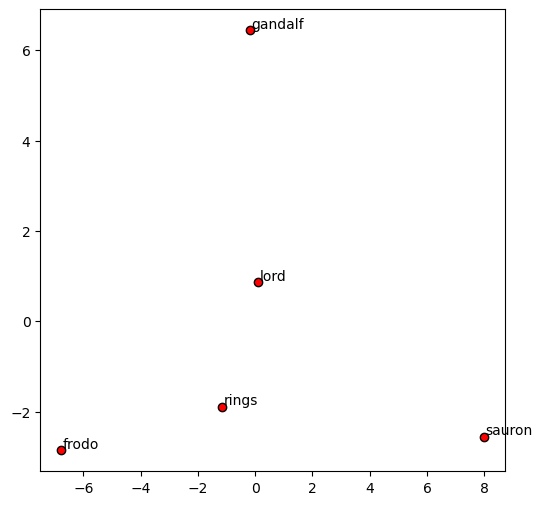

In [21]:
words = ["rings", "lord", "frodo", "sauron", "gandalf"]
display_pca_scatterplot(model, words)